# Semestralni prace ZSUR

## import potřebných knihoven

In [4]:


! git clone https://github.com/Fiiila/ZSUR_Semestralni_Prace.git
%cd ZSUR_Semestralni_Prace
! ls

%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import time

Cloning into 'ZSUR_Semestralni_Prace'...
remote: Enumerating objects: 180, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (100/100), done.
remote: Total 180 (delta 89), reused 101 (delta 45), pack-reused 35
Receiving objects: 100% (180/180), 107.84 KiB | 520.00 KiB/s, done.
Resolving deltas: 100% (100/100), done.
/content/ZSUR_Semestralni_Prace/ZSUR_Semestralni_Prace
Agl_m_v01.py   data.txt			   Retez_mapa.py
Bayes_klas.py  Iterativni_optimalizace.py  Rosenblat.py
Bin_deleni.py  Klasifikace_NN.py	   Uprav_metoda_konst_prirustku.py
Data	       Kmeans.py		   Vekt_kvant.py
dataTest2.txt  Maximin.py
dataTest.txt   Metoda_konst_prirustku.py


## Nacteni zdrojovych dat

In [5]:
import Agl_m_v01 as agl_m

Nacteni dat z csv souboru a vyber pozadovaneho mnozstvi dat z nich pro urychleni

**Nacteni vlastnich dat**

In [ ]:
#@title Nacteni vlastnich dat
from google.colab import files
uploaded = files.upload()

In [ ]:
filename = "second_data" #@param {type:"string"}

X,Y = agl_m.nactiDataDoPole(filename)


### **Nacteni puvodnich dodanych dat**

In [7]:
X,Y = agl_m.nactiDataDoPole('data')

Text(0, 0.5, 'y')

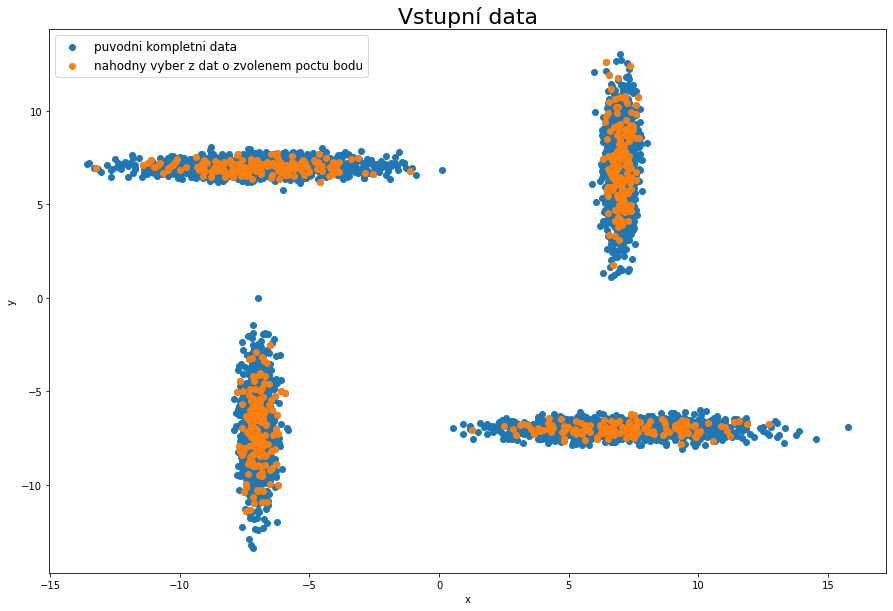

In [8]:
titleFont = {'fontsize': 22}
plt.figure(figsize=(15,10))
plt.scatter(X,Y)
pocetDat = 600 #@param {type:"integer"}
X,Y = agl_m.shuffleAndPickData(X,Y,pocetDat)
plt.scatter(X,Y)
plt.legend(['puvodni kompletni data', 'nahodny vyber z dat o zvolenem poctu bodu'],fontsize='large')
plt.title('Vstupní data', fontdict=titleFont)
plt.xlabel('x')
plt.ylabel('y')


# 1) Automatické určení počtu tříd

## Shluková metoda

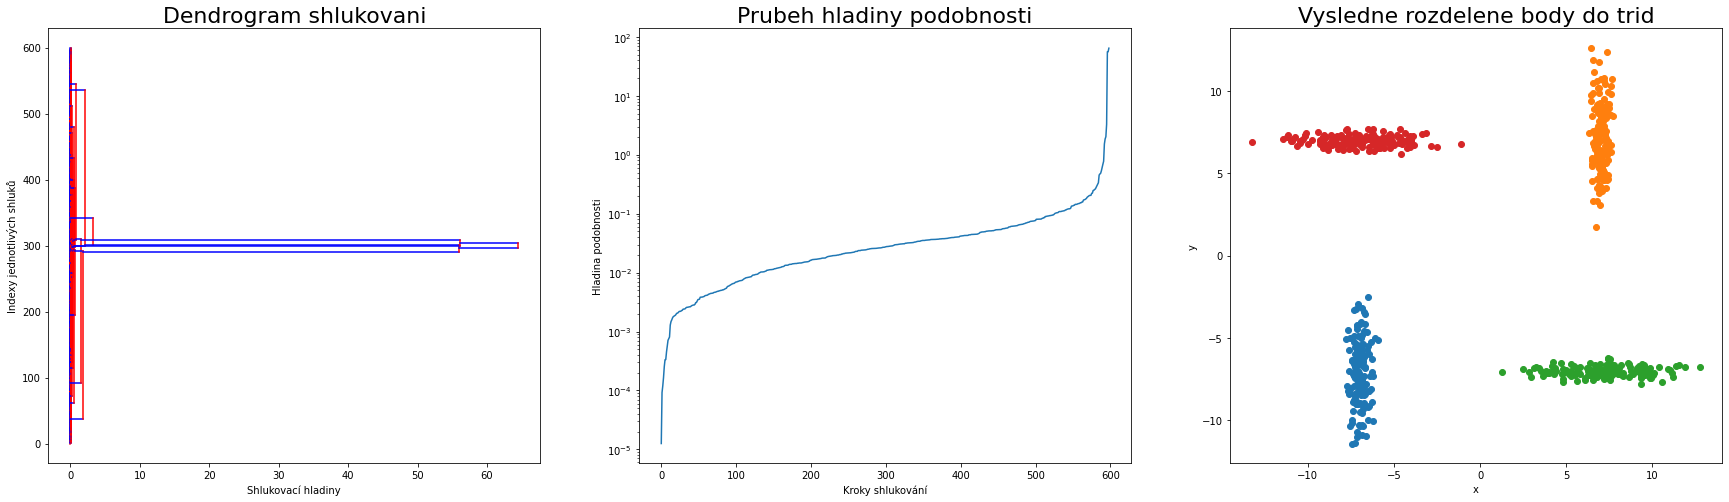

Metoda trvala 12.240457534790039 s
Nalezeno shluků: 4


In [9]:
#@markdown #Shluková metoda
#@markdown ---
plt.figure(figsize=(30,8))
plt.subplot(1,3,1)
plt.title('Dendrogram shlukovani',fontdict=titleFont)
start = time.time()
Ti,TI,shluky = agl_m.spustShlukovani(X,Y)
end = time.time()
plt.xlabel("Shlukovací hladiny")
plt.ylabel("Indexy jednotlivých shluků")

#@markdown
#@markdown Pro lepší zobrazení průběhu zvolte logarirmickou škálu osy **y**
scaleHladPod = "log" #@param ["log", "linear"]
plt.subplot(1,3,2)
plt.title('Prubeh hladiny podobnosti', fontdict=titleFont)
plt.yscale(scaleHladPod)
agl_m.vykresliPrubehH(TI)
H, _ = agl_m.najdiHladinuH(TI)
pocetShluku, labels = agl_m.labelPodleH(shluky, TI, H)
plt.xlabel('Kroky shlukování')
plt.ylabel("Hladina podobnosti")

plt.subplot(1,3,3)
agl_m.vykresliDataPodleLabelu(X, Y, labels)
plt.title('Vysledne rozdelene body do trid', fontdict=titleFont)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print(f"Metoda trvala {end-start} s")
print(f"Nalezeno shluků: {len(np.unique(labels))}")
saveLabels = labels


## Metoda řetězové mapy

In [10]:
import Retez_mapa as r_map

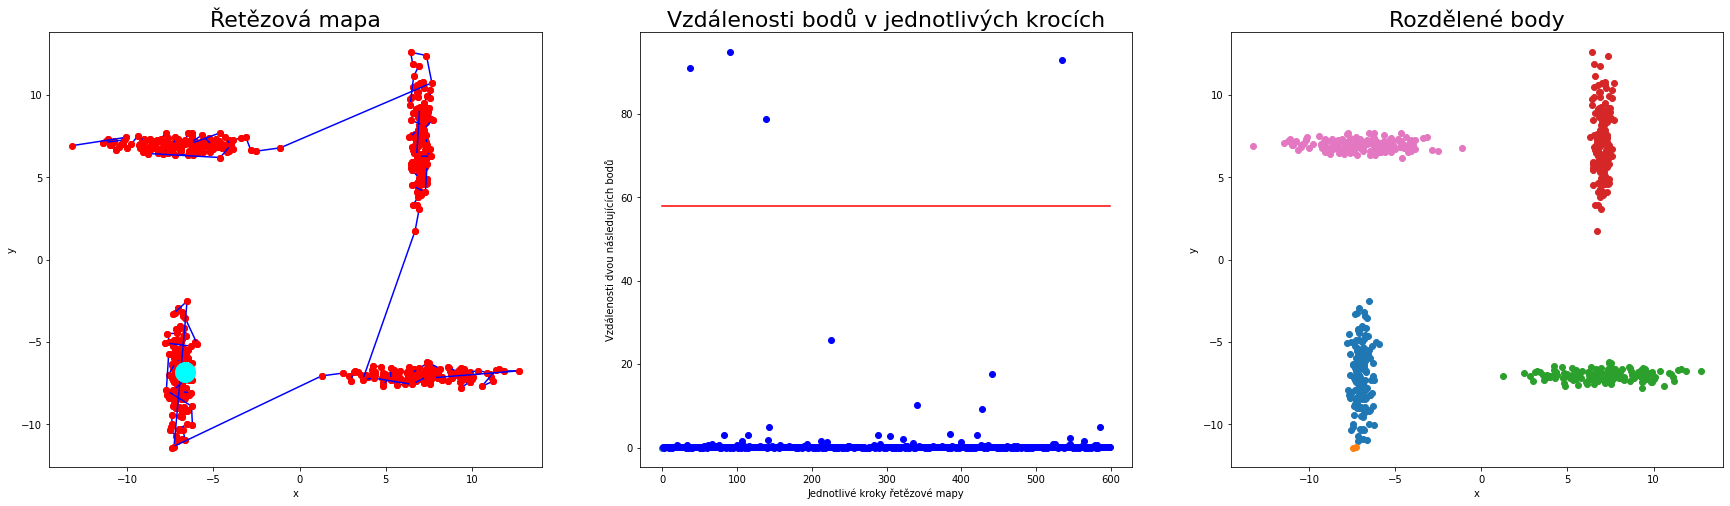

Metoda trvala 0.12060165405273438 s
Pocet nalezenych shluku je 5


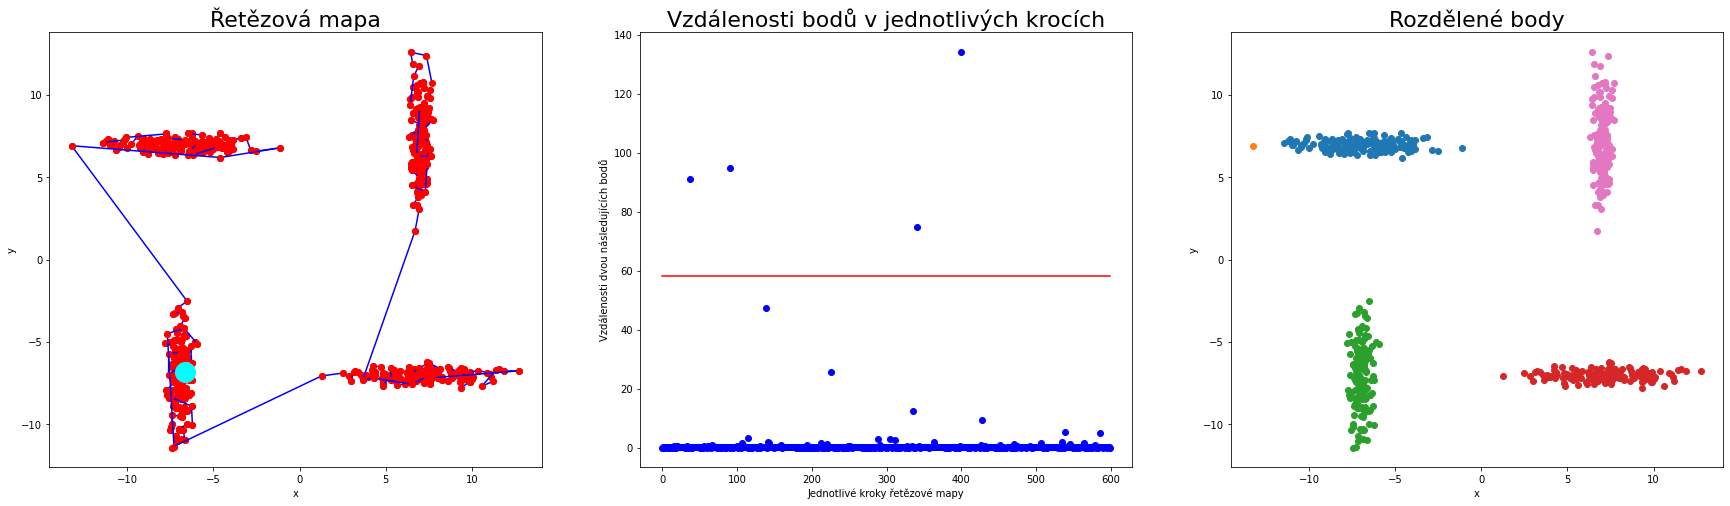

Metoda trvala 0.12246179580688477 s
Pocet nalezenych shluku je 5


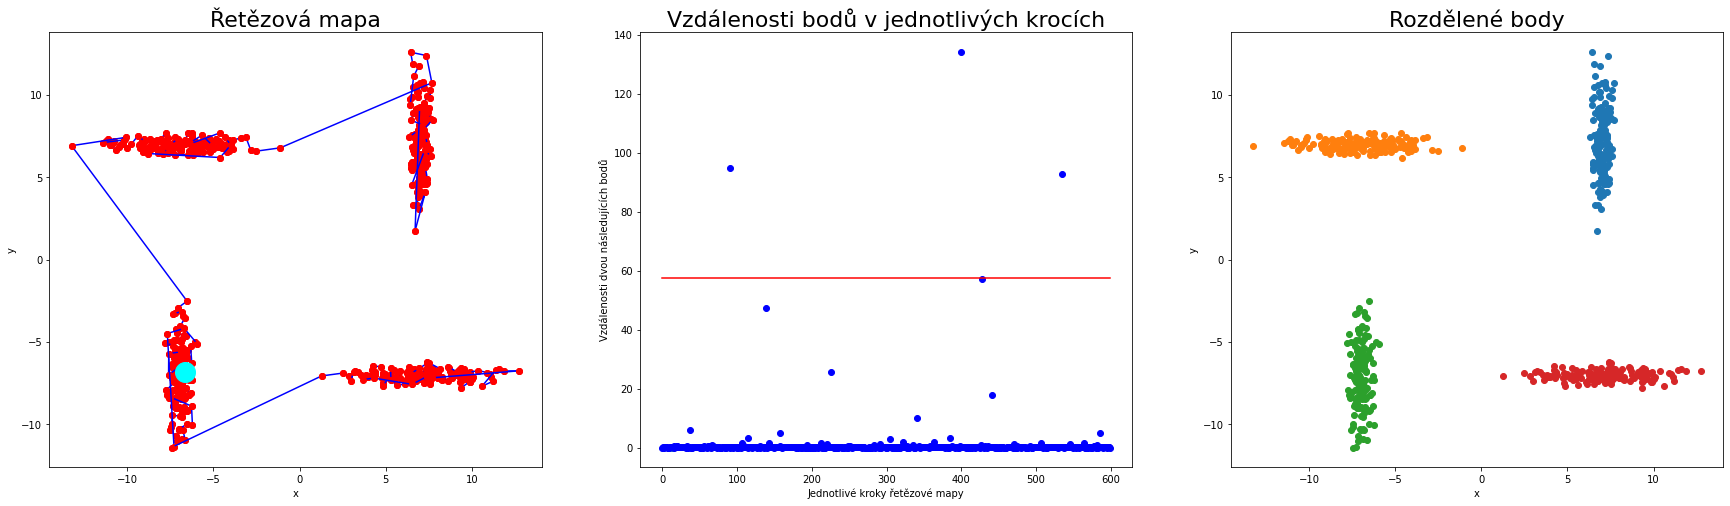

Metoda trvala 0.13448596000671387 s
Pocet nalezenych shluku je 4


In [11]:
#@markdown # Metoda řetězové mapy
#@markdown ---
#@markdown Indexy startovnich bodu pro jednotlive pokusy hledani retezove mapy
bod1 = 0 #@param {type:"integer"}
bod2 = 6 #@param {type:"integer"}
bod3 = 13 #@param {type:"integer"}
matice = agl_m.sestavMaticiVzdalenosti(X,Y)
startBody = [bod1,bod2,bod3]
#startovani z prvniho bodu
for i in range(len(startBody)):
  plt.figure(figsize=(30,8))
  plt.subplot(1,3,1)
  start = time.time()
  retMapa = r_map.hledejRetezMapu(matice, startovniBod=startBody[i])
  end = time.time()
  r_map.vykresliRetezMapu(retMapa, X, Y)
  plt.plot(X[bod1],Y[bod1],'o', color='cyan', MarkerSize=20)
  plt.title('Řetězová mapa', fontdict=titleFont)
  plt.xlabel('x')
  plt.ylabel('y')

  plt.subplot(1,3,2)
  distances = []
  plt.scatter(retMapa[0][0][0],0)
  for i in range(len(retMapa)):
    plt.scatter(retMapa[i][0][1],retMapa[i][1],color='blue')
    distances.append(retMapa[i][1])
  distances = np.array(distances)
  threshold = np.median(distances)*len(distances)*3
  plt.plot([0,len(distances)],[threshold]*2,'red')
  labels, pocetShluku = r_map.rozdelData(retMapa, threshold)
  plt.title('Vzdálenosti bodů v jednotlivých krocích', fontdict=titleFont)
  plt.xlabel("Jednotlivé kroky řetězové mapy")
  plt.ylabel("Vzdálenosti dvou následujících bodů")

  plt.subplot(1,3,3)
  agl_m.vykresliDataPodleLabelu(X,Y,labels)
  plt.title('Rozdělené body', fontdict=titleFont)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()
  print(f"Metoda trvala {end-start} s")
  print(f'Pocet nalezenych shluku je {pocetShluku}')

## Metoda MAXIMIN

In [12]:
from Maximin import pouzijMaximin, vykresliShluky

Metoda trvala 0.32420969009399414 s
Pocet nalezenych shluku je 8


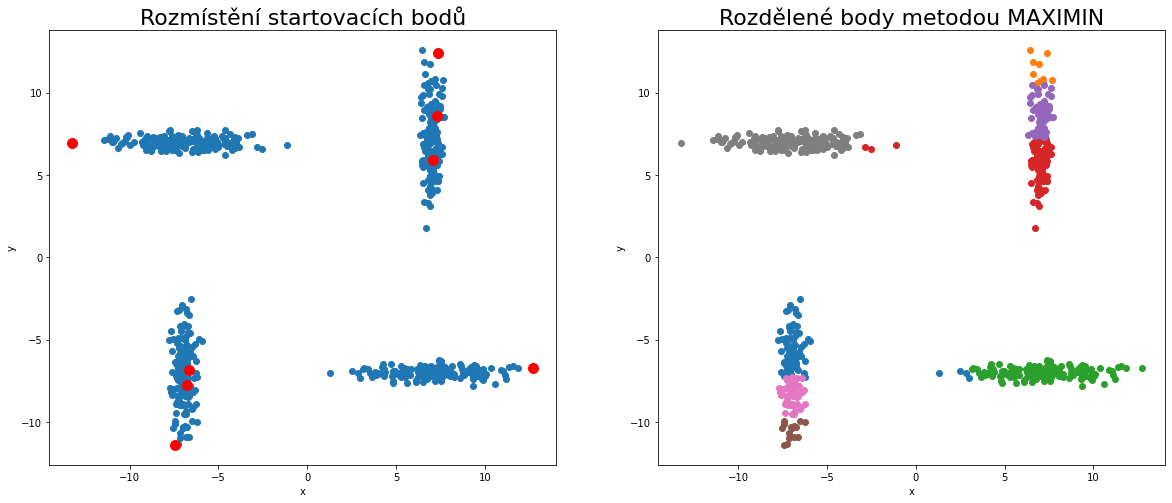

In [13]:
#@markdown #Metoda MAXIMIN
#@markdown ---
#@markdown Metoda nabizi dva volitelne parametry, koeficient **q** a startovni bod 
q = 0.5 #@param {type:"number"}
startovaci_bod = 0 #@param {type:"integer"}
start = time.time()
matice = agl_m.sestavMaticiVzdalenosti(X, Y)
Ti, u  = pouzijMaximin(matice, q=q, startovniBod=startovaci_bod)
end = time.time()
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.scatter(X,Y)
for i in range(len(u)):
  plt.plot(X[u[i]],Y[u[i]],'ro', MarkerSize=10)
plt.title('Rozmístění startovacích bodů', fontdict=titleFont)
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(1,2,2)
vykresliShluky(Ti, X, Y)
plt.title('Rozdělené body metodou MAXIMIN', fontdict=titleFont)
plt.xlabel('x')
plt.ylabel('y')
plt.show
print(f"Metoda trvala {end-start} s")
print(f'Pocet nalezenych shluku je {len(Ti)}')

>**Shluková metoda** trvala nejdelší dobu, ale podávala stabilně nejpřesnější výsledky na stejném vzorku dat.
---
>**Metoda řetězové mapy** byla z výše použitých metod nejrychlejší, což mohlo být ovlivněno i výpočtem matice vzdáleností všech bodů, ještě před spuštěním metody. Přesnost určení tříd však velmi závisí na zvolené metrice, pomocí níž se stanoví threshold.
---
>**Metoda MAXIMIN** byla trochu pomalejší než metoda řetězové mapy, protože již nebylo vhodně využít matici vzdáleností a urychlit tím tak metodu. Díky dvěma parametrům se však dalo velmi snadno naladit práh, jak rozlišovat třídy. Nerozdělovala však třídy tak spolehlivě jako shluková metoda.

# 2) Rozdělení dat do zjištěného počtu tříd

## Metoda K-means

In [14]:
from Kmeans import K_means

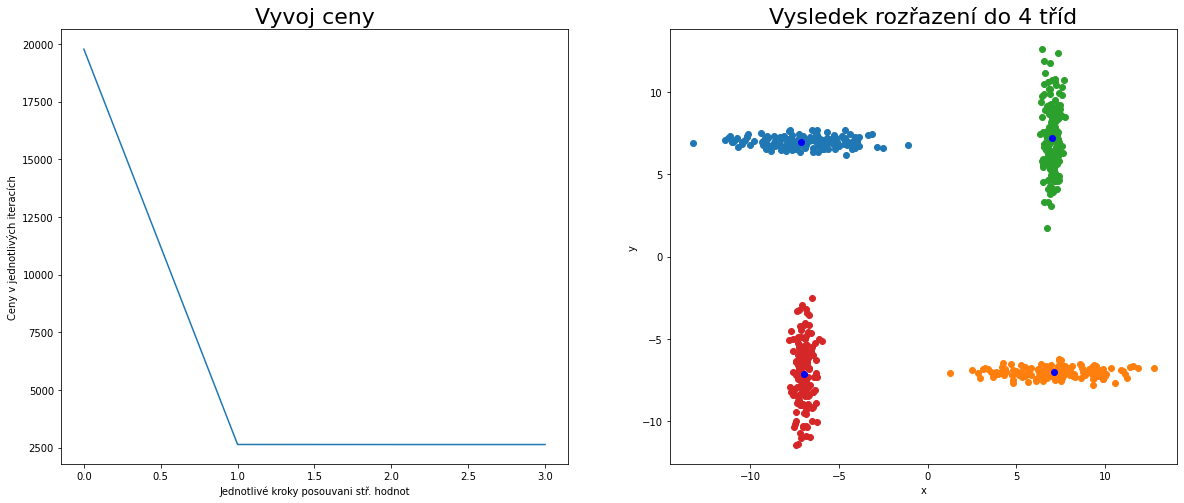

Metoda trvala 0.024356842041015625 s
Pocet nalezenych shluku je 4
Výsledná cena je 2637.04386098965


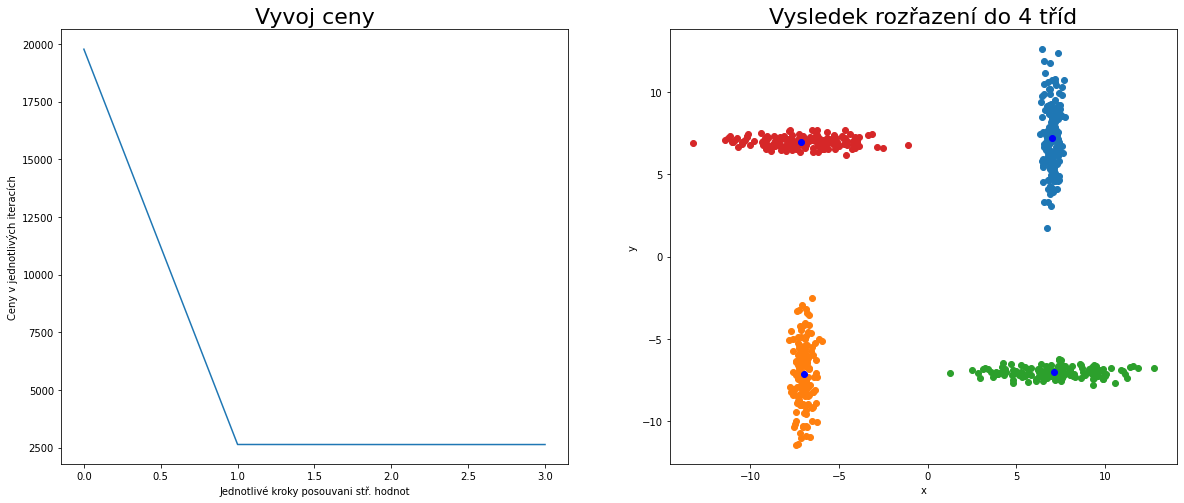

Metoda trvala 0.03879833221435547 s
Pocet nalezenych shluku je 4
Výsledná cena je 2637.04386098965


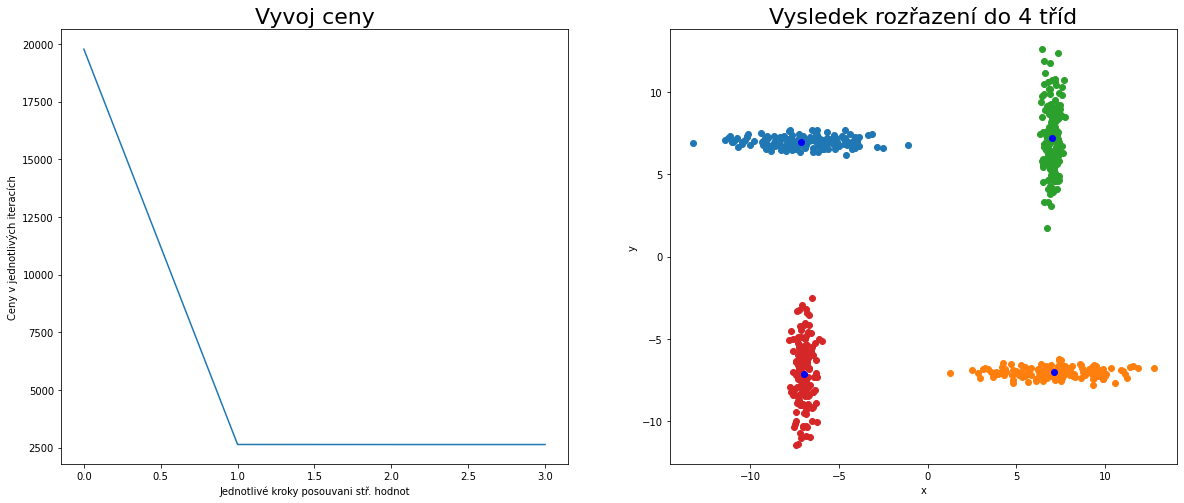

Metoda trvala 0.033524513244628906 s
Pocet nalezenych shluku je 4
Výsledná cena je 2637.04386098965


In [15]:
#@markdown # Metoda Kmeans
#@markdown ---
#@markdown Metoda funguje v plně automatickém režimu a nenabízí žádné volitelné parametry kromě počtu tříd do kterých má body rozdělit
pocet_trid =  4 #@param {type:"integer"}
data = np.stack((X,Y),axis=-1)
for i in range(3):
  start = time.time()
  Ti, J, u, _ = K_means(data, pocet_trid)
  end = time.time()
  
  plt.figure(figsize=(20,8))
  plt.subplot(1,2,1)
  plt.plot(range(len(J)),J)
  plt.title('Vyvoj ceny', fontdict=titleFont)
  plt.xlabel("Jednotlivé kroky posouvani stř. hodnot")
  plt.ylabel("Ceny v jednotlivých iteracích")

  plt.subplot(1,2,2)
  vykresliShluky(Ti, X, Y)
  plt.plot([u[0][0],u[1][0],u[2][0],u[3][0]],[u[0][1],u[1][1],u[2][1],u[3][1]],'bo')
  plt.title('Vysledek rozřazení do 4 tříd', fontdict=titleFont)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()
  print(f"Metoda trvala {end-start} s")
  print(f'Pocet nalezenych shluku je {len(Ti)}')
  print(f'Výsledná cena je {J[-1]}')

Průběh metody Kmeans se příliš neliší v jednotlivých pokusech, protože počáteční středy nejsou voleny zcela náhodně. Středy se hledají jako nejvzdálenější body v datasetu tak, aby byly všechny co nejdál od sebe najednou. Proto narozdíl od zcela náhodného volení středů získáváme celkem konstantní průběh metody a také výsledky se příliš neliší.

## Porovnani rovnoměrného binarního dělení s nerovnoměrným dělením

In [16]:
from Bin_deleni import rovnomerneBinDeleni, nerovnomerneBinDeleni
from Agl_m_v01 import vykresliDataPodleLabelu

Metoda rovnoměrné binární dělení trvala 0.048583030700683594
Metoda nerovnoměrné binární dělení trvala 0.033695220947265625


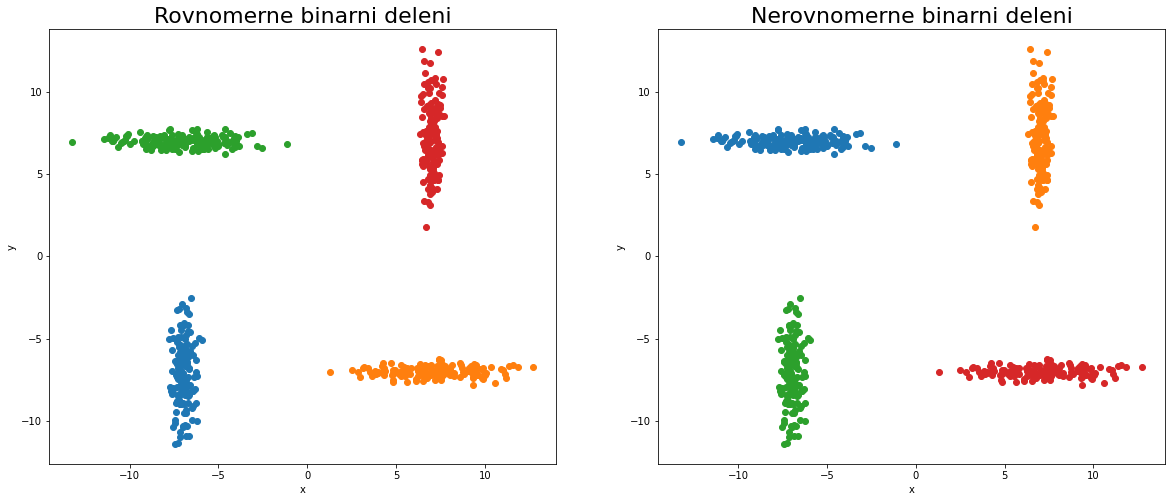

In [17]:
#@markdown #Binární dělení
#@markdown ---
#@markdown Volíme pouze počet tříd
pocet_trid = 4 #@param {type:"integer"}
data = np.stack((X, Y), axis=-1)


plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
start = time.time()
labels, stredy, cenaTrid, J = rovnomerneBinDeleni(data, pocet_trid)
end = time.time()
print(f"Metoda rovnoměrné binární dělení trvala {end-start}")
vykresliDataPodleLabelu(X,Y,labels)
plt.title('Rovnomerne binarni deleni', fontdict=titleFont)
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1,2,2)
start = time.time()
labels, stredy, cenaTrid, J = nerovnomerneBinDeleni(data, pocet_trid)
end = time.time()
print(f"Metoda nerovnoměrné binární dělení trvala {end-start}")
vykresliDataPodleLabelu(X,Y,labels)
plt.title('Nerovnomerne binarni deleni', fontdict=titleFont)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Na zadaných datech není příliš zřejmý rozdíl mezi jednotlivými metodami. Při jiném uskupení se však chovají odlišně a pomocí nerovnoměrného binárního dělení lze získat přesnější a rychlejší výsledek rozdělení, protože rozděluje jen shluky s nejvyšší cenou (narozdíl or rovnoměrného binárního dělení, které na tuto metriku neklade důraz)

# 3) Vyzkoušení iterativní optimalizace na předešlých datech

## Iterativní optimalizace

pro iterativní optimalizaci jsem zvolil data z metody MAXIMIN, která měla na stávajících datech doposud největší chybu.

In [18]:
from Iterativni_optimalizace import iterativniOptimalizace
import copy
#ulozeni dat pro optimalizaci
datait = copy.copy(data)
labelit = copy.copy(labels)

Pocet provedenych uprav: 126
Puvodni cena souctu trid: 24146.79517196901
Nova cena souctu trid: 2637.0438609896632


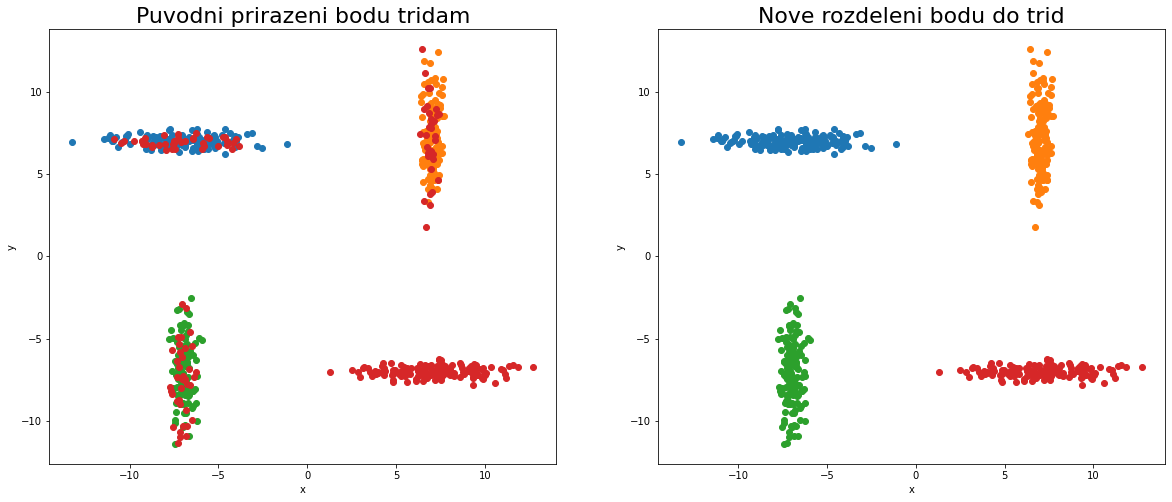

In [19]:
#@markdown Iterativní optimalizace
#@markdown ---
#@markdown ---
#zaneseni chyby
#@markdown jak velká část vstupních dat bude mít přepsané labely a tedy jak velkou dodatečnou chybu zaneseme
chyba = 0.25 #@param {type:"number"}
data = copy.copy(datait)
labels = copy.copy(labelit)
labels[0:len(data)//4] = np.unique(labels)[-1]
templabels = copy.copy(labels)
newlabels,cenyTrid_old, cenyTrid, stredniHodnoty = iterativniOptimalizace(data, templabels)
print(f"Puvodni cena souctu trid: {sum(cenyTrid_old)}")
print(f"Nova cena souctu trid: {sum(cenyTrid)}")
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
vykresliDataPodleLabelu(data[:, 0], data[:, 1], templabels, opacity=1)
plt.title('Puvodni prirazeni bodu tridam', fontdict=titleFont)
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1,2,2)
vykresliDataPodleLabelu(data[:, 0], data[:, 1], newlabels, opacity=1)
plt.title('Nove rozdeleni bodu do trid', fontdict=titleFont)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 4) Trénování klasifikátoru na základě informace od učitele
>potřebná trénovací data poskytla shlukovací metoda

## Bayesův klasifikátor

In [20]:
import math
from Bayes_klas import trainBayes,clasifGrid,clasifBayes
from Agl_m_v01 import vykresliDataPodleLabelu

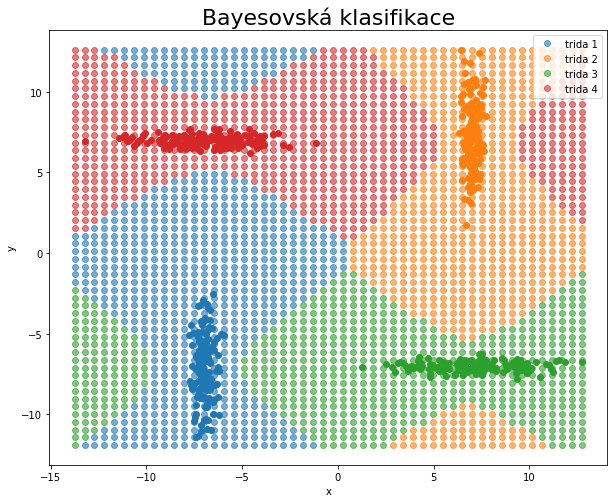

Metoda trvala 0.5478887557983398
Počet shluků je 4


In [21]:
#@markdown # Bayesův klasifikátor
#@markdown ---
#@markdown U Bayesova klasifikátoru nevolíme parametry, protože si je sám získá z trénovacích dat
#nacteni dat
data = np.stack((X, Y), axis=-1)
labels = np.array(saveLabels)
#trenovani klasifikatoru na zadanych datech s odpovidajicim labelem
start = time.time()
stredniHodnoty, covMat, aprPpsti = trainBayes(data, labels)
#zjisteni pozadi bayesova klasifikatoru na plose dat
gridPoints,gridLabel = clasifGrid(data,stredniHodnoty,covMat,aprPpsti)
dataLabels = clasifBayes(data,stredniHodnoty,covMat,aprPpsti)
end = time.time()
plt.figure(figsize=(10,8))
vykresliDataPodleLabelu(gridPoints[:,0],gridPoints[:,1],gridLabel, opacity=0.6)
plt.legend(['trida 1','trida 2','trida 3','trida 4','nelze klasifikovat'])
vykresliDataPodleLabelu(data[:, 0], data[:, 1], dataLabels, opacity=1)
plt.title('Bayesovská klasifikace', fontdict=titleFont)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print(f"Metoda trvala {end-start}")
print(f'Počet shluků je {len(np.unique(labels))}')

## Vektorová kvantizace

In [22]:
from Vekt_kvant import vektorKvantizace

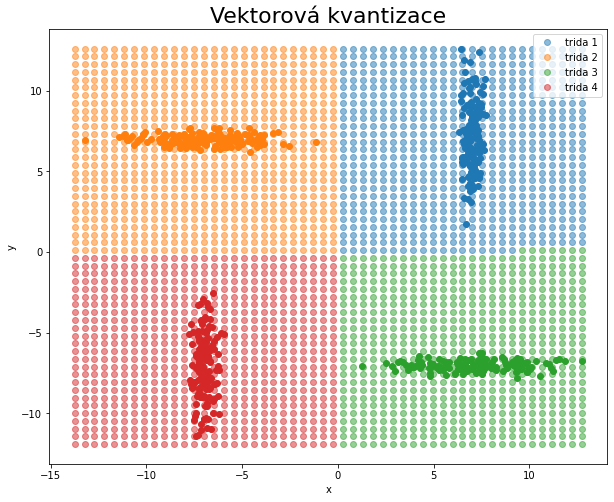

Metoda trvala 0.04306435585021973


In [23]:
#@markdown # Vektorová kvantizace
#@markdown ---
#@markdown Volíme počet tříd, do kterých má být prostor klasifikován
pocet_trid = 4 #@param {type:"integer"}
data = np.stack((X, Y), axis=-1)
start = time.time()
grid, gridLabels, labels, stredy = vektorKvantizace(data, 4)
end = time.time()
plt.figure(figsize=(10,8))
vykresliDataPodleLabelu(grid[:,0], grid[:,1], gridLabels, opacity=0.5)
plt.legend(['trida 1','trida 2','trida 3','trida 4','nelze klasifikovat'])
vykresliDataPodleLabelu(data[:,0], data[:,1], labels, opacity=1)
plt.title('Vektorová kvantizace', fontdict=titleFont)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print(f"Metoda trvala {end-start}")

## Klasifikace podle nejbližšího souseda

In [24]:
from Klasifikace_NN import makeGrid, pouzijKNN

Metoda trvala 2.544670820236206


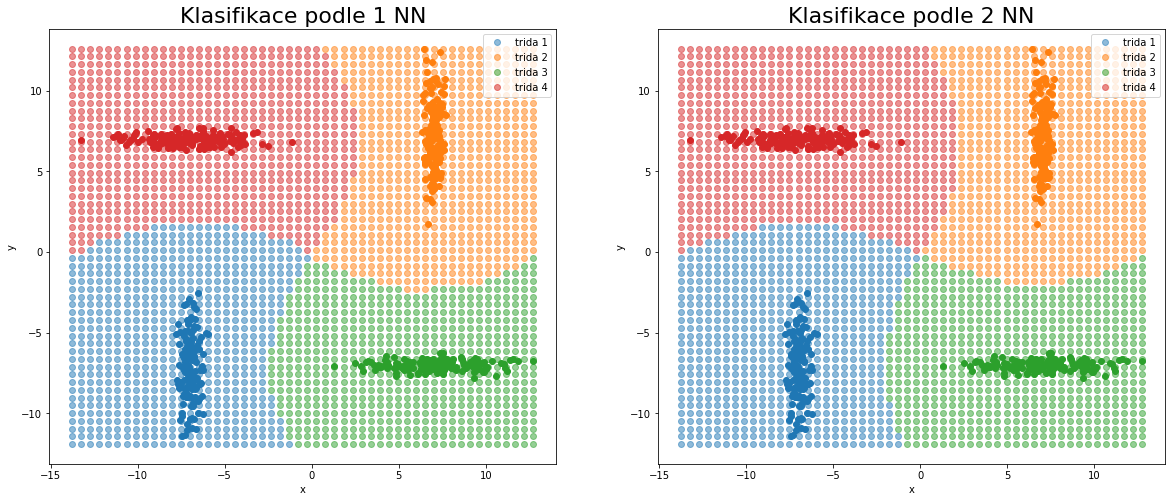

Metoda trvala 2.5223066806793213


In [25]:
#@markdown #Klasifikace podle NN (Nearest Neighbour)
#@markdown ---
#@markdown První vykreslený graf bude s nastaveným jedním NN, pocet NN v druhém grafu si zvolte
data = np.stack((X, Y), axis=-1)
labels = saveLabels
xmin, xmax = np.min(data[:, 0]), np.max(data[:, 0])
ymin, ymax = np.min(data[:, 1]), np.max(data[:, 1])
grid = makeGrid(xmin,xmax,ymin,ymax,noStep=50)
start = time.time()
gridlabels = pouzijKNN(data,labels,grid,K=1)
end = time.time()
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
vykresliDataPodleLabelu(grid[:, 0], grid[:, 1], gridlabels, opacity=0.5)
plt.legend(['trida 1','trida 2','trida 3','trida 4','nelze klasifikovat'])
vykresliDataPodleLabelu(data[:, 0], data[:, 1], labels, opacity=1)
plt.title('Klasifikace podle 1 NN', fontdict=titleFont)
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(1,2,2)
print(f"Metoda trvala {end-start}")
#@markdown Počet NN (Nearest Neigthbours) **n**
n =   2#@param {type:"integer"}
start = time.time()
gridlabels = pouzijKNN(data,labels,grid,K=n)
end = time.time()
vykresliDataPodleLabelu(grid[:, 0], grid[:, 1], gridlabels, opacity=0.5)
plt.legend(['trida 1','trida 2','trida 3','trida 4','nelze klasifikovat'])
vykresliDataPodleLabelu(data[:, 0], data[:, 1], labels, opacity=1)
plt.title(f'Klasifikace podle {n} NN', fontdict=titleFont)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print(f"Metoda trvala {end-start}")

## Klasifikátory s lineární distribuční funkcí

### Rosenblattův algoritmus

In [26]:
from Rosenblat import trainRosenblat, clasify

Training fcn 0 1
Training epoch 20/20 průměrná cena: 0.05
Training fcn 0 2
Training epoch 20/20 průměrná cena: 0.1
Training fcn 0 3
Training epoch 20/20 průměrná cena: 0.1
Training fcn 1 2
Training epoch 20/20 průměrná cena: 0.1
Training fcn 1 3
Training epoch 20/20 průměrná cena: 0.15
Training fcn 2 3
Training epoch 20/20 průměrná cena: 0.05


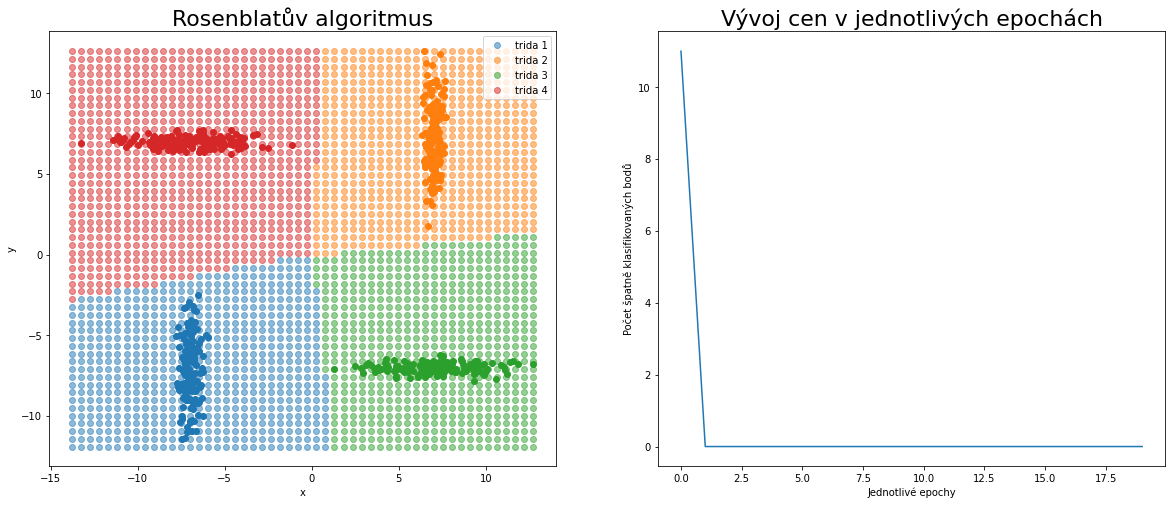

Metoda trvala 2.5223066806793213


In [27]:
#@markdown #Roseblattův algoritmus
#@markdown ---
#@markdown Algorimtus probíhá automaticky a parametry si natrénuje v zadaném počtu epoch
epochs = 20 #@param {type:"integer"}
poDvou = True #@param ["True", "False"] {type:"raw"}
data = np.stack((X, Y), axis=-1)
xmin, xmax = np.min(data[:, 0]), np.max(data[:, 0])
ymin, ymax = np.min(data[:, 1]), np.max(data[:, 1])
grid = makeGrid(xmin, xmax, ymin, ymax, noStep=50)
q,vyvojCeny = trainRosenblat(data, labels, epochs=epochs, poDvou=poDvou)
q = np.asarray(q)
gridlabels = clasify(grid, q)

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
vykresliDataPodleLabelu(grid[:, 0], grid[:, 1], gridlabels, opacity=0.5)
plt.legend(['trida 1','trida 2','trida 3','trida 4','nelze klasifikovat'])
vykresliDataPodleLabelu(data[:, 0], data[:, 1], labels, opacity=1)
plt.title('Rosenblatův algoritmus', fontdict=titleFont)
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1,2,2)
plt.plot(vyvojCeny)
plt.title('Vývoj cen v jednotlivých epochách', fontdict=titleFont)
plt.xlabel("Jednotlivé epochy")
plt.ylabel("Počet špatně klasifikovaných bodů")
plt.show()

print(f"Metoda trvala {end-start}")

#pro zajimavost
#linearni diskriminacni funkce
#q,vyvojCeny = trainRosenblat(data, labels, epochs=20, poDvou=False)
#q = np.asarray(q)
#gridlabels = clasify(grid, q, poDvou=False)
#plt.figure(figsize=(20,8))
#plt.subplot(1,2,1)
#vykresliDataPodleLabelu(grid[:, 0], grid[:, 1], gridlabels, opacity=0.3)
#vykresliDataPodleLabelu(data[:, 0], data[:, 1], labels, opacity=1)
#plt.subplot(1,2,2)
#lt.plot(vyvojCeny)
#lt.show()


### Metoda konstantnich prirustku

In [28]:
from Metoda_konst_prirustku import trainKonstPrir

Training fcn 0 1
Training epoch 30/30 průměrná cena: 0.5666666666666667
Training fcn 0 2
Training epoch 30/30 průměrná cena: 0.6
Training fcn 0 3
Training epoch 30/30 průměrná cena: 0.5666666666666667
Training fcn 1 2
Training epoch 30/30 průměrná cena: 0.23333333333333334
Training fcn 1 3
Training epoch 30/30 průměrná cena: 0.3
Training fcn 2 3
Training epoch 30/30 průměrná cena: 0.3


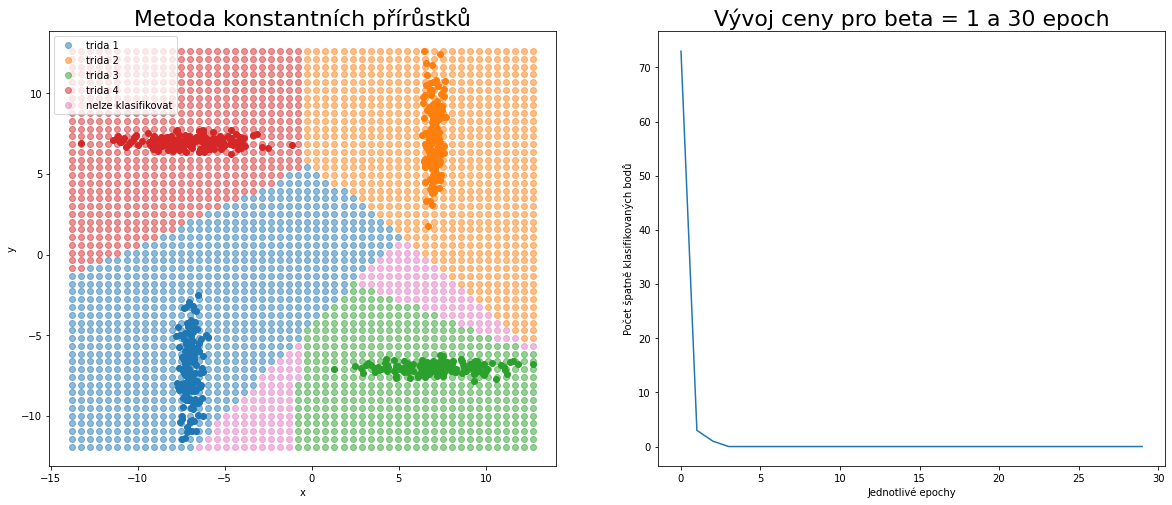

Metoda trvala 2.6115922927856445
Training fcn 0 1
Training epoch 30/30 průměrná cena: 5.166666666666667
Training fcn 0 2
Training epoch 30/30 průměrná cena: 5.466666666666667
Training fcn 0 3
Training epoch 30/30 průměrná cena: 5.3
Training fcn 1 2
Training epoch 30/30 průměrná cena: 2.033333333333333
Training fcn 1 3
Training epoch 30/30 průměrná cena: 2.6333333333333333
Training fcn 2 3
Training epoch 30/30 průměrná cena: 2.6


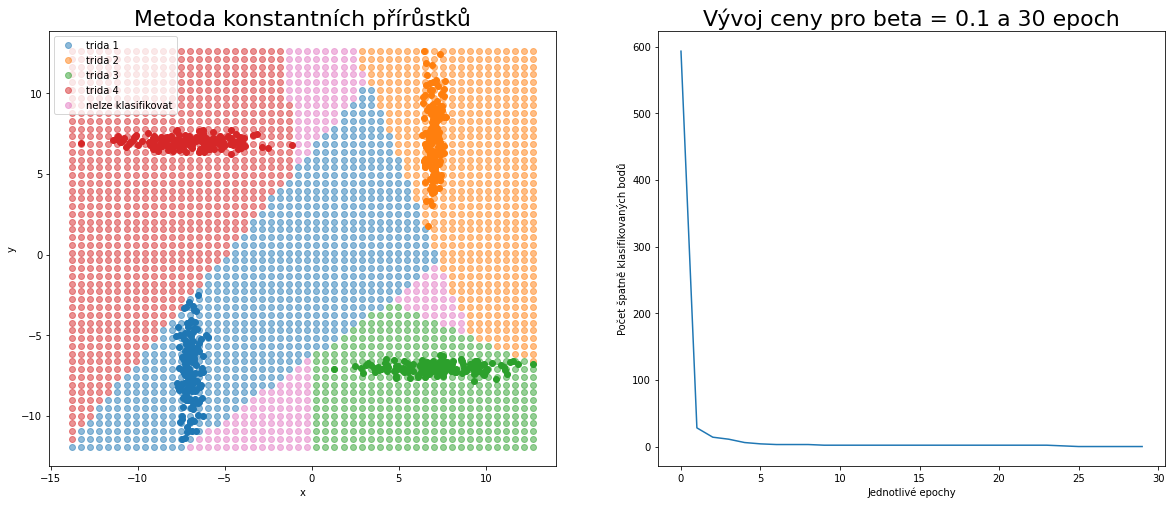

Metoda trvala 2.6256277561187744
Training fcn 0 1
Training epoch 30/30 průměrná cena: 52.1
Training fcn 0 2
Training epoch 30/30 průměrná cena: 54.53333333333333
Training fcn 0 3
Training epoch 30/30 průměrná cena: 52.86666666666667
Training fcn 1 2
Training epoch 30/30 průměrná cena: 16.866666666666667
Training fcn 1 3
Training epoch 30/30 průměrná cena: 17.166666666666668
Training fcn 2 3
Training epoch 30/30 průměrná cena: 17.866666666666667


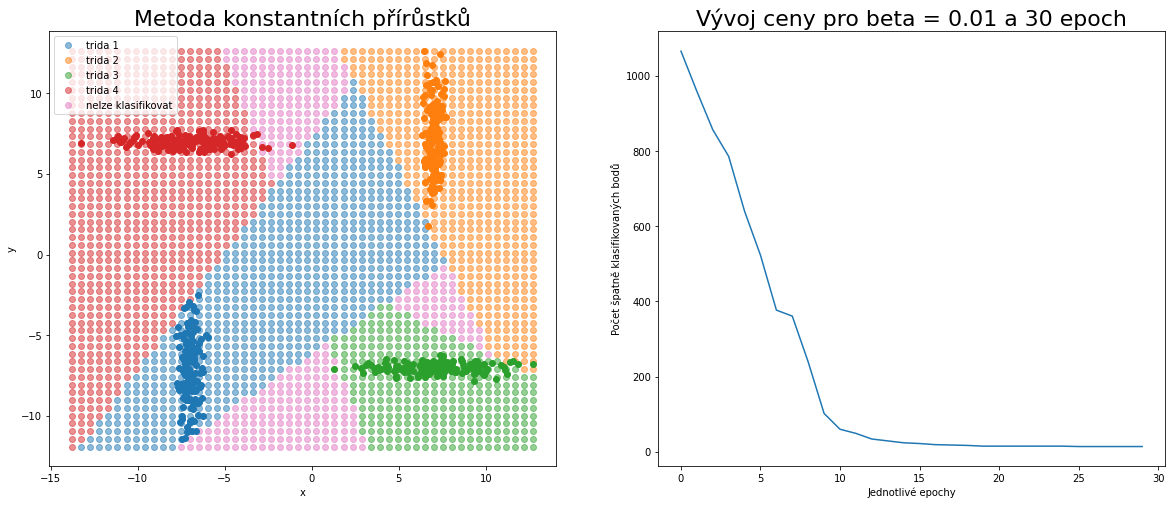

Metoda trvala 2.804382801055908


In [29]:
#@markdown #Metoda konstantních přírůstků
#@markdown ---
data = np.stack((X, Y), axis=-1)
xmin, xmax = np.min(data[:, 0]), np.max(data[:, 0])
ymin, ymax = np.min(data[:, 1]), np.max(data[:, 1])
grid = makeGrid(xmin, xmax, ymin, ymax, noStep=50)
epochs =  30#@param {type:"integer"}
beta = [1,0.1,0.01] #@param {type:"raw"}
poDvou = True #@param ["True", "False"] {type:"raw"}
for i in range(len(beta)):
  start = time.time()
  q,vyvojCeny = trainKonstPrir(data, labels, epochs=epochs,beta=beta[i], poDvou=poDvou)
  q = np.asarray(q)
  gridlabels = clasify(grid, q)
  end = time.time()

  plt.figure(figsize=(20,8))
  plt.subplot(1,2,1)
  vykresliDataPodleLabelu(grid[:, 0], grid[:, 1], gridlabels, opacity=0.5)
  plt.legend(['trida 1','trida 2','trida 3','trida 4','nelze klasifikovat'])
  vykresliDataPodleLabelu(data[:, 0], data[:, 1], labels, opacity=1)
  plt.title('Metoda konstantních přírůstků', fontdict=titleFont)
  plt.xlabel('x')
  plt.ylabel('y')

  plt.subplot(1,2,2)
  plt.plot(vyvojCeny)
  plt.title(f'Vývoj ceny pro beta = {beta[i]} a {epochs} epoch', fontdict=titleFont)
  plt.xlabel("Jednotlivé epochy")
  plt.ylabel("Počet špatně klasifikovaných bodů")
  plt.show()
  print(f"Metoda trvala {end-start}")

### Upravená metoda konstantních přírůstků

In [30]:
from Uprav_metoda_konst_prirustku import trainUprKonstPrir

Training fcn 0 1
Training epoch 20/20 průměrná cena: 0.5
Training fcn 0 2
Training epoch 20/20 průměrná cena: 0.25
Training fcn 0 3
Training epoch 20/20 průměrná cena: 1.45
Training fcn 1 2
Training epoch 20/20 průměrná cena: 0.2
Training fcn 1 3
Training epoch 20/20 průměrná cena: 0.35
Training fcn 2 3
Training epoch 20/20 průměrná cena: 1.3


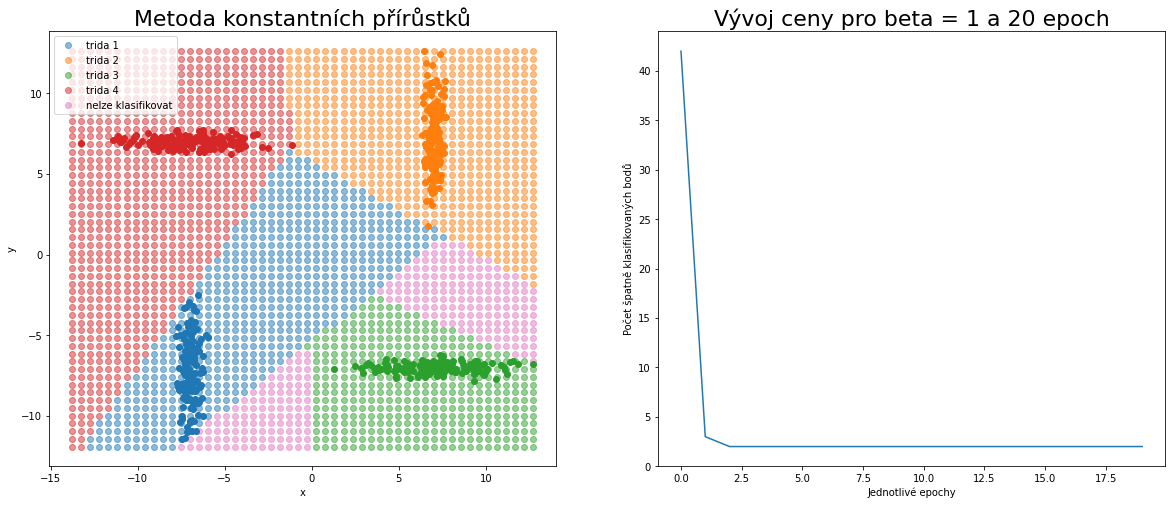

Metoda trvala 1.7576713562011719
Training fcn 0 1
Training epoch 20/20 průměrná cena: 1.15
Training fcn 0 2
Training epoch 20/20 průměrná cena: 2.65
Training fcn 0 3
Training epoch 20/20 průměrná cena: 0.3
Training fcn 1 2
Training epoch 20/20 průměrná cena: 0.1
Training fcn 1 3
Training epoch 20/20 průměrná cena: 1.3
Training fcn 2 3
Training epoch 20/20 průměrná cena: 0.1


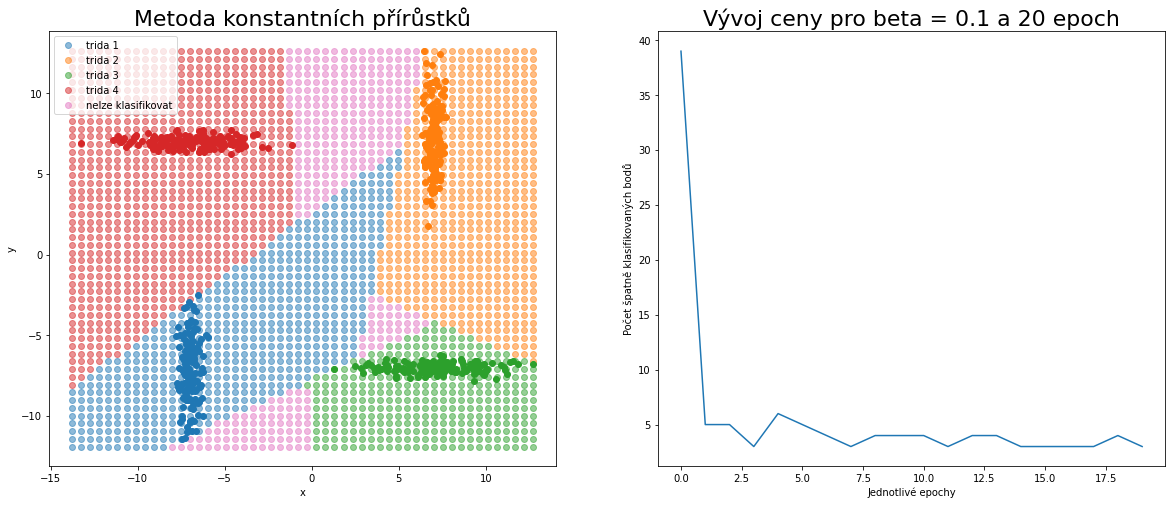

Metoda trvala 1.8724470138549805
Training fcn 0 1
Training epoch 20/20 průměrná cena: 1.4
Training fcn 0 2
Training epoch 20/20 průměrná cena: 0.4
Training fcn 0 3
Training epoch 20/20 průměrná cena: 1.2
Training fcn 1 2
Training epoch 20/20 průměrná cena: 0.35
Training fcn 1 3
Training epoch 20/20 průměrná cena: 1.2
Training fcn 2 3
Training epoch 20/20 průměrná cena: 1.25


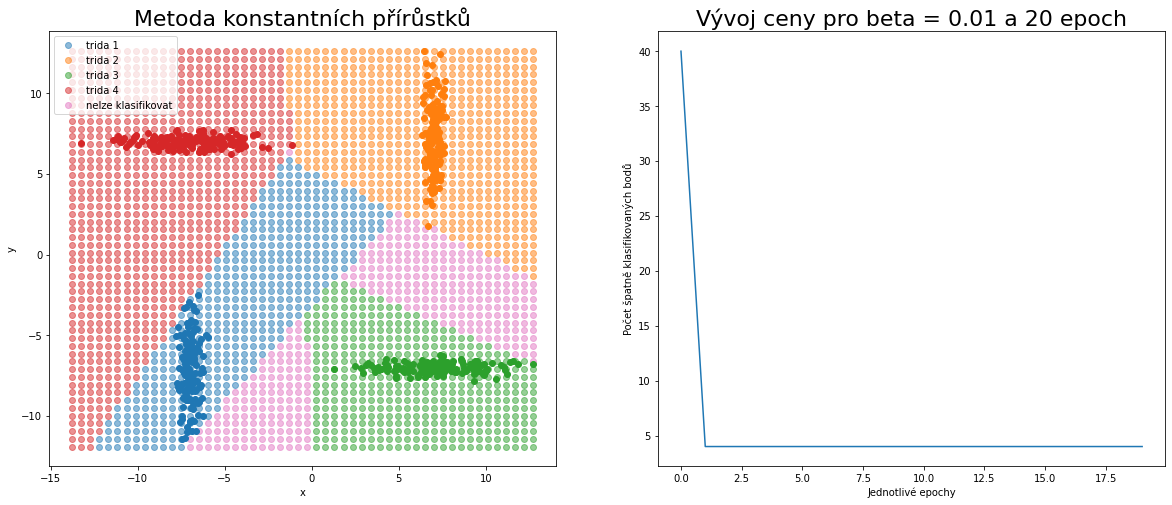

Metoda trvala 1.8683404922485352


In [31]:
#@markdown #Metoda upravených konstantních přírůstků
#@markdown ---
data = np.stack((X, Y), axis=-1)
xmin, xmax = np.min(data[:, 0]), np.max(data[:, 0])
ymin, ymax = np.min(data[:, 1]), np.max(data[:, 1])
grid = makeGrid(xmin, xmax, ymin, ymax, noStep=50)
epochs =  20#@param {type:"integer"}
beta = [1,0.1,0.01] #@param {type:"raw"}
poDvou = True #@param ["True", "False"] {type:"raw"}
for i in range(len(beta)):
  start = time.time()
  q,vyvojCeny = trainUprKonstPrir(data, labels, epochs=epochs ,beta=beta[i], poDvou=poDvou)
  q = np.asarray(q)
  gridlabels = clasify(grid, q)
  end = time.time()

  plt.figure(figsize=(20,8))
  plt.subplot(1,2,1)
  vykresliDataPodleLabelu(grid[:, 0], grid[:, 1], gridlabels, opacity=0.5)
  plt.legend(['trida 1','trida 2','trida 3','trida 4','nelze klasifikovat'])
  vykresliDataPodleLabelu(data[:, 0], data[:, 1], labels, opacity=1)
  plt.title('Metoda konstantních přírůstků', fontdict=titleFont)
  plt.xlabel('x')
  plt.ylabel('y')

  plt.subplot(1,2,2)
  plt.plot(vyvojCeny)
  plt.title(f'Vývoj ceny pro beta = {beta[i]} a {epochs} epoch', fontdict=titleFont)
  plt.xlabel("Jednotlivé epochy")
  plt.ylabel("Počet špatně klasifikovaných bodů")
  plt.show()
  print(f"Metoda trvala {end-start}")